In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from pathlib import Path
import sys
import matplotlib.pyplot as plt
import openai
from dotenv import load_dotenv
import os

In [40]:
BASE_PATH = Path.cwd().parent
TESTING_FILES_BASE_PATH = BASE_PATH/"testing"/"files"
sys.path.append(str(BASE_PATH))

load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")


In [41]:
def recognise_emotion(message):
    response = openai.chat.completions.create(
        model="gpt-4o",
        messages=[
            {"role": "system", "content": f"""
                                        Identify the emotion of the user from the following message, 
                                        output only 1 emotion from the following list as it appears: {EMOTIONS}.
            """},
            {"role": "user", "content": message}
        ],
        max_tokens=1000,
        temperature=0.7
    )
    return response.choices[0].message.content

In [42]:
def plot_pie_chart(data, labels, title='Pie Chart'):
    plt.figure(figsize=(6, 6))
    plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
    plt.tight_layout()
    plt.show()

Message: I'm at my wit's end with my colleague constantly taking credit for my ideas; how do I handle this without causing drama?
Predicted: frustration

Message: I really need advice on dealing with a coworker who keeps undermining me in meetings; it's getting unbearable.
Predicted: frustration

Message: How do I address the fact that my teammate is always late with their part of the project, leaving me to pick up the slack?
Predicted: frustration

Message: What should I do about my coworker who keeps interrupting me during presentations, making me look incompetent?
Predicted: frustration

Message: I'm frustrated with my colleague who never responds to emails on time, and it's affecting my work; any tips on handling this?
Predicted: frustration

Message: My coworker has been gossiping about me and spreading false rumors; how do I confront them without making it worse?
Predicted: frustration

Message: I'm struggling with a team member who constantly dismisses my contributions; how can 

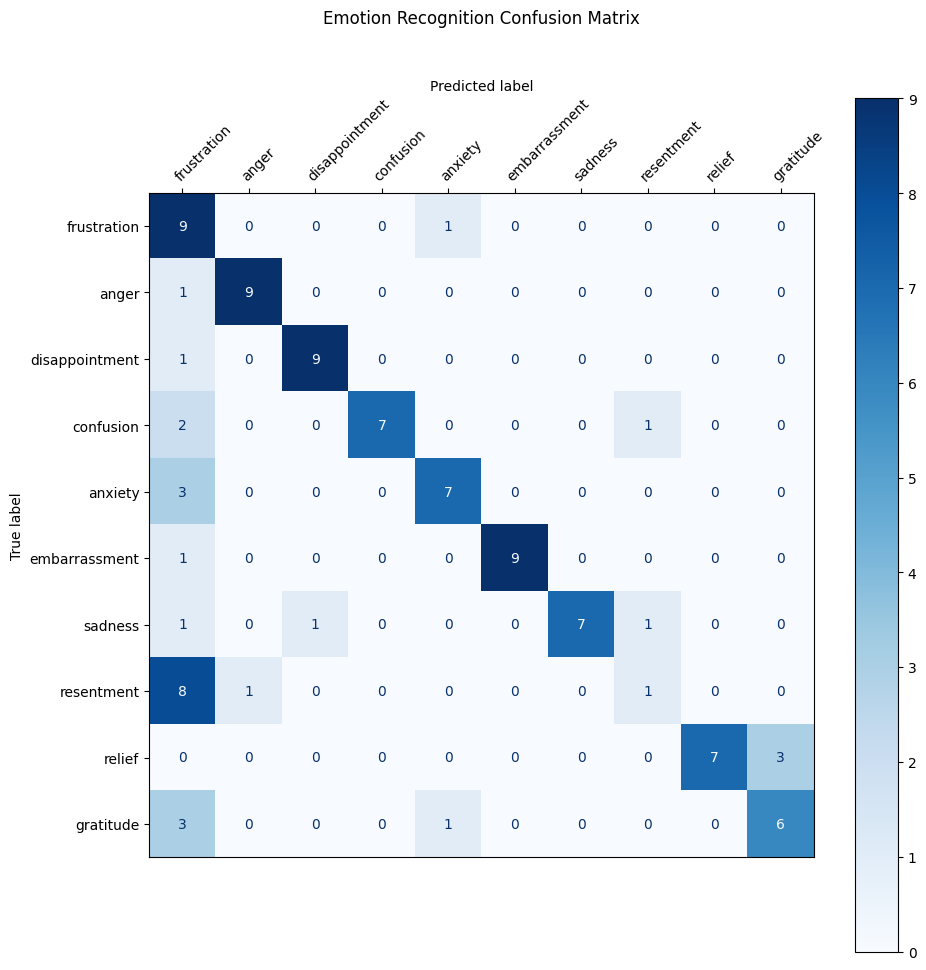


Total Accuracy: 71.00%


In [45]:
from model.main import EMOTIONS
MESSAGES_PER_EMOTION = 10
total_correct = 0

true_labels = []
predicted_labels = []

for emotion in EMOTIONS:
    with open(TESTING_FILES_BASE_PATH / "messages" / f"recognise_user_{emotion}.txt", encoding="utf-8") as fp:
        messages = fp.read().split("\n")

    for message in messages:
        prediction = recognise_emotion(message)
        print(f"Message: {message}\nPredicted: {prediction}\n")
        true_labels.append(emotion)
        predicted_labels.append(prediction)

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=EMOTIONS)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=EMOTIONS)

# Display the matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=EMOTIONS)
disp.plot(cmap="Blues", ax=ax)

ax.xaxis.set_label_position('top') 
ax.xaxis.tick_top()

plt.setp(ax.get_xticklabels(), rotation=45, ha="left", rotation_mode="anchor")
plt.title("Emotion Recognition Confusion Matrix", pad=40)

plt.tight_layout()
plt.show()

# Calculate overall accuracy
total_correct = sum(1 for t, p in zip(true_labels, predicted_labels) if t == p)
total_accuracy = total_correct / len(true_labels)
print(f"\nTotal Accuracy: {total_accuracy:.2%}")
